# Importing Data & Libraries

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

events_df = pd.read_csv("C:/Users/ricca/Desktop/FootballData/game_events.csv")

# Data Preparation

In [2]:
events_df.shape

(666558, 10)

In [3]:
events_df.head(10)

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0
3,aef768899cedac0c9a650980219075a2,2012-08-05,2211607,53,Goals,383,36500,", Right-footed shot, 2. Tournament Goal Assist...",NaN,146258.0
4,5d6d9533023057b6619ecd145a038bbe,2012-08-05,2211607,74,Substitutions,383,36500,", Not reported",49499.0,NaN
5,eef9c46dd75c3aa4c6a503225427446e,2012-08-05,2211607,11,Goals,383,38497,", Right-footed shot, 1. Tournament Goal Assist...",NaN,33210.0
6,5d5aef7dedcd5dc9d35dea9438ee35e0,2012-08-05,2211607,90,Cards,610,42710,1. Yellow card,NaN,NaN
7,7717860e3b0376b86f445f4749fa2ce5,2012-08-05,2211607,44,Goals,610,42710,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,4425.0
8,02c708273f4fa2003873ef5908e4e3a6,2012-08-05,2211607,79,Cards,610,45509,1. Yellow card,NaN,NaN
9,d1be2ce4bd5f0ca091c1b15a8569301c,2012-08-05,2211607,90,Goals,383,49499,", Right-footed shot, 1. Tournament Goal Assist...",NaN,167850.0


In [4]:
events_df = events_df.set_index('game_event_id')

In [5]:
events_df.isna().sum()

# player_in_id è presente solo quando type = Substitution
# player_assist_id è presente solo quando type = Goal
# description non è presente quando type = Substitution

date                     0
game_id                  0
minute                   0
type                     0
club_id                  0
player_id                0
description         336325
player_in_id        245309
player_assist_id    635701
dtype: int64

In [6]:
events_df.dtypes

date                 object
game_id               int64
minute                int64
type                 object
club_id               int64
player_id             int64
description          object
player_in_id        float64
player_assist_id    float64
dtype: object

In [7]:
# converting data types
events_df['date'] = pd.to_datetime(events_df['date'])

In [8]:
events_df.dtypes

date                datetime64[ns]
game_id                      int64
minute                       int64
type                        object
club_id                      int64
player_id                    int64
description                 object
player_in_id               float64
player_assist_id           float64
dtype: object

In [9]:
events_df['description'].describe()

count             330233
unique              4650
top       , Not reported
freq               40096
Name: description, dtype: object

In [10]:
events_df['minute'].describe()

count    666558.000000
mean         63.503254
std          21.927700
min          -1.000000
25%          51.000000
50%          68.000000
75%          80.000000
max         120.000000
Name: minute, dtype: float64

In [11]:
events_df.query('minute == -1')

,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
game_event_id,,,,,,,,,
874987f117bca74599041037e0c43075,2012-08-05,2211607,-1,Cards,610,124883,1. Yellow card,NaN,NaN
3aaa80875fbd40d6286c2ad811c81dd5,2012-08-19,2221757,-1,Cards,127,2198,"1. Yellow card , Foul",NaN,NaN
12332d376f646311d98f269f05f261db,2012-08-19,2221757,-1,Cards,127,2201,"1. Yellow card , Dissent",NaN,NaN
acd8bc16b3cefb8f03542964942a7379,2012-08-19,2221757,-1,Cards,10,39105,"1. Yellow card , Foul",NaN,NaN
5d52467708d6c25d619b6198c1b3681f,2012-08-19,2221757,-1,Cards,10,77879,"1. Yellow card , Serious foul",NaN,NaN
...,...,...,...,...,...,...,...,...,...
cfe2e2c9bdebe69d5f2a115b089d29eb,2023-11-14,4227998,-1,Shootout,1072,485994,", Scored",NaN,NaN
192d0d70152ad2caa9012b8cfbe5f144,2023-11-14,4227998,-1,Shootout,1072,552615,", Saved",NaN,NaN
04dbf4c98add438c33a61f93ee2e3f5e,2023-11-14,4227998,-1,Shootout,34888,583997,", Saved",NaN,NaN


In [12]:
# remove rows where minute = -1
events_df = events_df.query('minute != -1')

# Data Analysis & Visualization

In [13]:
# limitiamo l'analisi alle partite del 2023
current_events = events_df.query('date >= "2023-01-01"')

Media di minute: 64.65


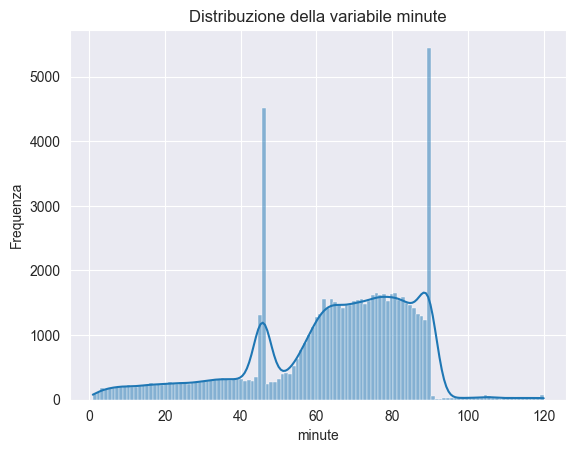

In [20]:
df = current_events
var = 'minute'

mean_value = df[var].mean()
print(f"Media di {var}: {mean_value:.2f}")

sns.histplot(data=df, x=var, kde=True, bins=120)
plt.title(f'Distribuzione della variabile {var}')
plt.xlabel(f'{var}')
plt.ylabel('Frequenza')
plt.show()

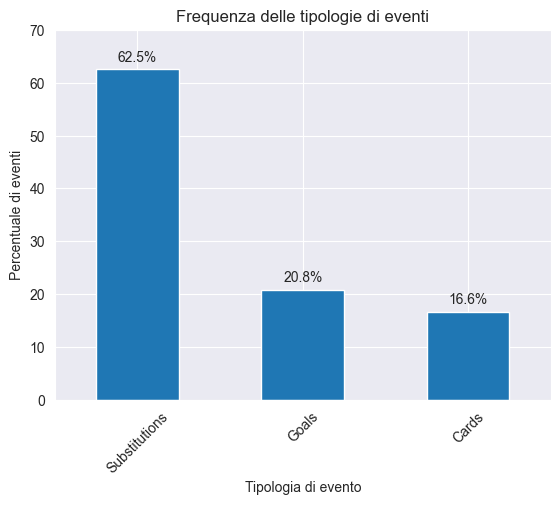

In [15]:
# frequenza delle tipologie di eventi
event_count = current_events['type'].value_counts()
event_percentages = (event_count / len(current_events)) * 100

ax = event_percentages.plot(kind='bar')

for i, v in enumerate(event_percentages):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

plt.title('Frequenza delle tipologie di eventi')
plt.ylim(0,70)
plt.ylabel('Frequenza %')
plt.xlabel('Tipologia di evento')
plt.xticks(rotation=45)
plt.show()

Totale di goal segnati nel primo tempo: 6238
Totale di goal segnati nel secondo tempo: 7405


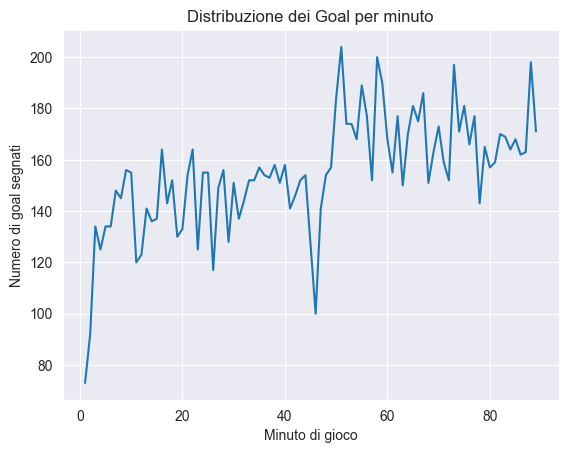

In [16]:
# distribuzione dei gol per minuto di gioco

# togliamo 90 e 45 min perchè comprendono anche i minuti di recupero
goal_events = current_events.query('type == "Goals" and minute<90 and minute!=45')

goal_per_minute = goal_events['minute'].value_counts().sort_index()

first_half_goals = len(goal_events.query('minute <= 45'))
second_half_goals = len(goal_events.query('minute > 45'))

print(f"Totale di goal segnati nel primo tempo: {first_half_goals}")
print(f"Totale di goal segnati nel secondo tempo: {second_half_goals}")

sns.lineplot(data=goal_per_minute)
plt.title('Distribuzione dei Goal per minuto')
plt.xlabel('Minuto di gioco')
plt.ylabel('Numero di goal segnati')
plt.show()

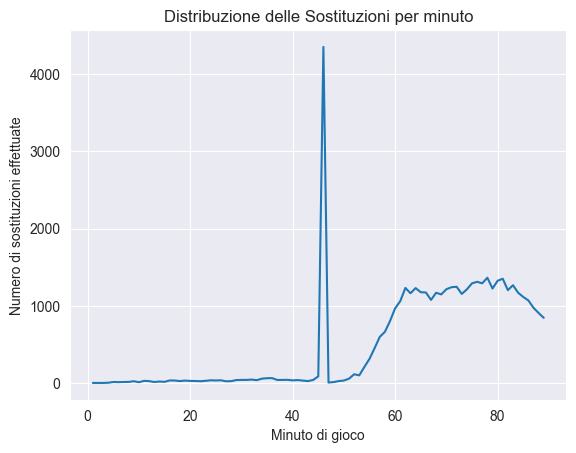

In [17]:
# distribuzione delle sostituzioni per minuto di gioco

# togliamo tempi supplementari (min>=90)
subs_events = current_events.query('type == "Substitutions" and minute<90')

subs_per_minute = subs_events['minute'].value_counts().sort_index()

sns.lineplot(data=subs_per_minute)
plt.title('Distribuzione delle Sostituzioni per minuto')
plt.xlabel('Minuto di gioco')
plt.ylabel('Numero di sostituzioni effettuate')
plt.show()